In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv("startup_funding.csv")
year=[]

for items in df['Date']:
    # df['year']=df.Date.str.split('/', expand=True)[2]  this way few items not splitted due to absense of /
            
    year.append(items[-4:]) # fetch last four digit from string , handles exception in data well
    
    

array=np.array(year,dtype=str)
array=np.delete(array,np.where(array=='None'))
array=np.delete(array,np.where(array==''))

year,jobcount=np.unique(array,return_counts=True)


    
plt.plot(year,jobcount,'b--')
plt.show()

for i in range(len(year)):
    print(year[i],jobcount[i])

In [ ]:
#same as above

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("startup_funding.csv")
year = []
for items in df['Date']:
    year.append(items[-4:])
year = np.array(year, dtype = int)
d = {}
for item in year:
    if d.get(item, 0) == 0:
        d[item] = 1
    else:
        d[item] += 1
lists = sorted(d.items())
x, y = zip(*lists)
plt.plot(x, y)
plt.show()
for (i, j) in lists:
    print ("{} {}".format(i, j)) 

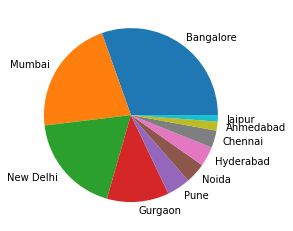

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('startup_funding.csv',encoding='utf-8')

df["CityLocation"].dropna(inplace=True)    # drop na values
df = df[df["CityLocation"].notnull()]      # drop null values  

df["CityLocation"].replace("Delhi", "New Delhi", inplace=True)    # clean data
df["CityLocation"].replace("bangalore", "Bangalore", inplace=True)  # clean data

location=[]

for item in df["CityLocation"]:              # for handling twin city for one startup, retain 1st city (indian)
    loc=item.split('/')[0].strip()
    location.append(loc)                      # store the city value in a list
    

array=np.array(location,dtype=str)
city,jobcount=np.unique(array,return_counts=True)           # return unique value with its count in two different array

df_1=pd.DataFrame(list(zip(city,jobcount)))          # combine and create a pd dataframe for data 
df_1.columns=['city','jobcount']

#df_1=df_1.loc[df_1['city']!='nan']                   # could be used for dropping if any nan value, but not there


df_1=df_1.sort_values(by='jobcount',ascending=False)   # sort and get top 10 value
df_1=df_1.head(10)

plt.pie(df_1['jobcount'],labels=df_1['city'])
plt.show()

for i in range (10):
     print(df_1.iloc[i][0],df_1.iloc[i][1])





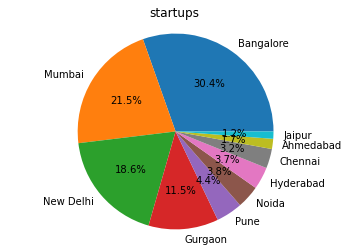

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


In [125]:
# same implementation as above

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
path = "startup_funding.csv"
data = pd.read_csv(path,encoding='utf-8')
df=data.copy()
df["CityLocation"].dropna(inplace=True)
df = df[df["CityLocation"].notnull()]

def separateCity(s):
    return s.split("/")[0].strip()

df["CityLocation"] = df["CityLocation"].apply(separateCity)
df["CityLocation"].replace("Delhi", "New Delhi", inplace=True)
df["CityLocation"].replace("bangalore", "Bangalore", inplace=True)

s=df["CityLocation"].value_counts()[0:10]
cities = s.index
num_startups = s.values

plt.title('startups')
plt.pie(num_startups,labels=cities, autopct="%.1f%%")
plt.axis('equal')
plt.show()

for i in range(len(cities)):
    print(cities[i], num_startups[i])

In [ ]:
import pandas as pd
import numpy as np

df=pd.read_csv('startup_funding.csv',encoding='utf-8')

df = df[df["CityLocation"].notnull()]      # drop null values
df = df[df["AmountInUSD"].notnull()] 

df["CityLocation"].replace("Delhi", "New Delhi", inplace=True)    # clean data
df["CityLocation"].replace("bangalore", "Bangalore", inplace=True)  # clean data
df["AmountInUSD"]=df["AmountInUSD"].str.replace(",", "").astype(int)


for item in df["CityLocation"]:              # for handling twin city for one startup, retain 1st city (indian)
    df["CityLocation"].loc[df["CityLocation"]==item] = item.split('/')[0]   # replace old value with new
 

df_1=df.groupby(by=["CityLocation"],as_index=False).sum()
df_1=df_1.sort_values(by="AmountInUSD",ascending=False)   # sort and get top 10 value
df_1=df_1.head(10)


amtarray=np.array(df_1["AmountInUSD"])
amtsum=np.sum(amtarray)
pctval=(amtarray*100)/np.sum(amtarray)

for i in range(10):
    print(df_1.iloc[i][0],"{:.2f}".format(pctval[i]))
    


In [ ]:
#same as above with lesser time

import pandas as pd
import numpy as np 
df_start=pd.read_csv('startup_funding.csv',encoding='utf-8') 
df_start['CityLocation'].dropna(inplace=True)

def separateCity(city):
    return city.split('/')[0].strip() 

df_start['CityLocation']=df_start['CityLocation'].apply(separateCity) 
df_start['CityLocation'].replace("Delhi","New Delhi",inplace=True) 
df_start['CityLocation'].replace("bangalore","Bangalore",inplace=True)

## Converting "AmountInUSD" into numeric format
df_start["AmountInUSD"] = df_start["AmountInUSD"].apply(lambda x: float(str(x).replace(",","")))
df_start["AmountInUSD"] = pd.to_numeric(df_start["AmountInUSD"])
city_amount=df_start.groupby('CityLocation')['AmountInUSD'].sum().sort_values(ascending=False)[0:10]
city=city_amount.index
amountCity=city_amount.values
perAmount=np.true_divide(amountCity, amountCity.sum())*100
for i in range(len(city)):
    print(city[i],format(perAmount[i],'.2f'))
    

In [ ]:
#same as above with lesser time

import pandas as pd
import numpy as np

df=pd.read_csv('startup_funding.csv',encoding='utf-8')

df = df[df["CityLocation"].notnull()]      # drop null values
df = df[df["AmountInUSD"].notnull()] 

df["CityLocation"].replace("Delhi", "New Delhi", inplace=True)    # clean data
df["CityLocation"].replace("bangalore", "Bangalore", inplace=True)  # clean data
df["AmountInUSD"]=df["AmountInUSD"].str.replace(",", "").astype(int)


# for item in df["CityLocation"]:              # for handling twin city for one startup, retain 1st city (indian)
#     df["CityLocation"].loc[df["CityLocation"]==item] = item.split('/')[0]   # replace old value with new

def separateCity(city):
    return city.split('/')[0].strip() 

df['CityLocation']=df['CityLocation'].apply(separateCity) 

df_1=df.groupby(by=["CityLocation"],as_index=False).sum()
df_1=df_1.sort_values(by="AmountInUSD",ascending=False)   # sort and get top 10 value
df_1=df_1.head(10)


amtarray=df_1["AmountInUSD"].values
pctval=np.true_divide(amtarray, amtarray.sum())*100

for i in range(len(amtarray)):
    print(df_1.iloc[i][0],format(pctval[i],'.2f'))
    
    
# amtarray=np.array(df_1["AmountInUSD"])
# amtsum=np.sum(amtarray)
# pctval=(amtarray*100)/np.sum(amtarray)

# for i in range(10):
#     print(df_1.iloc[i][0],"{:.2f}".format(pctval[i]))
    

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('startup_funding.csv',encoding='utf-8')


#df['InvestmentType'].unique()        # to find the anamalous value

df = df[df["AmountInUSD"].notnull()]    # drop null values

df["InvestmentType"].replace("SeedFunding", "Seed Funding", inplace=True)    # clean data
df["InvestmentType"].replace("PrivateEquity", "Private Equity", inplace=True)  # clean data
df["InvestmentType"].replace("Crowd funding", "Crowd Funding", inplace=True)  # clean data
df=df.loc[df['InvestmentType']!='nan']
df["AmountInUSD"]=df["AmountInUSD"].str.replace(",", "").astype(int)



df_1=df.groupby(by=["InvestmentType"],as_index=False).sum()
df_1=df_1.sort_values(by="AmountInUSD",ascending=False)   # sort and get top 10 value
df_1=df_1.head(10)

plt.pie(df_1["AmountInUSD"],labels=df_1["InvestmentType"])
plt.show()

amtarray=df_1["AmountInUSD"].values
pctval=np.true_divide(amtarray, amtarray.sum())*100

for i in range(len(amtarray)):
    print(df_1.iloc[i][0],format(pctval[i],'.2f'))
    

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('startup_funding.csv',encoding='utf-8')


#df['IndustryVertical'].unique()        # to find the anamalous value

df = df[df["AmountInUSD"].notnull()]    # drop null values

df["IndustryVertical"].replace("eCommerce", "Ecommerce", inplace=True)    # clean data
df["IndustryVertical"].replace("ECommerce", "Ecommerce", inplace=True)    # clean data
df["IndustryVertical"].replace("ecommerce", "Ecommerce", inplace=True)    # clean data

df=df.loc[df['InvestmentType']!='nan']
df["AmountInUSD"]=df["AmountInUSD"].str.replace(",", "").astype(int)



df_1=df.groupby(by=["IndustryVertical"],as_index=False).sum()
df_1=df_1.sort_values(by="AmountInUSD",ascending=False)   # sort and get top 10 value
df_1=df_1.head()

plt.pie(df_1["AmountInUSD"],labels=df_1["IndustryVertical"])
plt.show()

amtarray=df_1["AmountInUSD"].values
pctval=np.true_divide(amtarray, amtarray.sum())*100

for i in range(len(amtarray)):
    print(df_1.iloc[i][0],format(pctval[i],'.2f'))
    

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('startup_funding.csv',encoding='utf-8')

for item in df['StartupName']:
    if 'ola' in item.lower():
        df['StartupName'].loc[df['StartupName']==item] = 'Ola'
    if 'flipkart' in item.lower():
        df['StartupName'].loc[df['StartupName']==item] = 'Flipkart'    
    if 'oyo' in item.lower():
        df['StartupName'].loc[df['StartupName']==item] = 'Oyo'    
    if 'paytm' in item.lower():
        df['StartupName'].loc[df['StartupName']==item] = 'Paytm'

df = df[df["AmountInUSD"].notnull()]    # drop null values



df=df.loc[df['StartupName']!='nan']
df["AmountInUSD"]=df["AmountInUSD"].str.replace(",", "").astype(int)


df_1=df.groupby(by=["StartupName"],as_index=False).sum()
df_1=df_1.sort_values(by="AmountInUSD",ascending=False)   # sort and get top 5 value
df_1=df_1.head()



for i in range(5):
    print(df_1.iloc[i][0])

In [ ]:
import pandas as pd
import numpy as np

data=pd.read_csv('startup_funding.csv',encoding='utf-8')

df=data.copy()

for item in df['StartupName']:
    if 'ola' in item.lower():
        df['StartupName'].loc[df['StartupName']==item] = 'Ola'
    if 'kart' in item.lower():
        df['StartupName'].loc[df['StartupName']==item] = 'Flipkart'    
    if 'oyo' in item.lower():
        df['StartupName'].loc[df['StartupName']==item] = 'Oyo'    
    if 'payt' in item.lower():
        df['StartupName'].loc[df['StartupName']==item] = 'Paytm'

array=df['StartupName']
        
startup,count=np.unique(array,return_counts=True)
        
df_1=pd.DataFrame(list(zip(startup,count)))          # combine and create a pd dataframe for data 
df_1.columns=['startup','count']


df_1=df_1.sort_values(by='count',ascending=False)   # sort and get top 5 value
df_1=df_1.head()


for i in range (5):
     print(df_1.iloc[i][0],df_1.iloc[i][1])
    

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_start=pd.read_csv('startup_funding.csv',encoding='utf-8')
df_start.dropna(subset=['StartupName'],inplace=True)
df_start.StartupName.unique()
df_start['StartupName'].replace('Olacabs','Ola',inplace = True)
df_start['StartupName'].replace('Ola Cabs','Ola',inplace = True)
df_start['StartupName'].replace('Flipkart.com','Flipkart',inplace = True)
df_start['StartupName'].replace('Paytm Marketplace','Paytm',inplace = True)
df_start['StartupName'].replace('Oyo Rooms','Oyo',inplace = True)
df_start['StartupName'].replace('Oyorooms','Oyo',inplace = True)
df_start['StartupName'].replace('OyoRooms','Oyo',inplace = True)
df_start['StartupName'].replace('OYO Rooms','Oyo',inplace = True)
e=df_start['StartupName'].value_counts()
for i in range(0,5):
    print(str(e.index[i])+" "+str(e.values[i]))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('startup_funding.csv')
df["InvestorsName"].dropna(inplace=True)    # drop na values
df = df[df["InvestorsName"].notnull()]      # drop null values



for item in df['InvestorsName']:
    
    if 'sequoia capital india advisors' in item.lower():
        df['InvestorsName'].loc[df['InvestorsName']==item] = 'Capital'
    if 'sequoia capital global equities' in item.lower():
        df['InvestorsName'].loc[df['InvestorsName']==item] = 'S Capital'
    if 'sequoia capital india' in item.lower():
        df['InvestorsName'].loc[df['InvestorsName']==item] = 'S1 Capital'
    if 'sequoia capital' in item.lower():
        df['InvestorsName'].loc[df['InvestorsName']==item] = 'Sequoia Capital'

  

count=df['InvestorsName'].value_counts()


print(str(count.index[0])+" "+str(count.values[0]))



Sequoia Capital 64


C:\anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
#same as above

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('startup_funding.csv',encoding='utf-8')

df.dropna(subset=['StartupName'],inplace=True)
df = df[df["InvestorsName"].notnull()]

def investor_dict(namearray):
    dict={}
    for i in namearray:
        if ',' not in i:
            if i in dict:
                dict[i]=dict.get(i)+1
            else:
                dict[i]=1
        else:
            string=i.strip().split(',')
            for j in string:
                if j.strip() in dict:
                    dict[j.strip()]=dict.get(j.strip())+1
                else:
                    dict[j.strip()]=1
    return dict

dict=investor_dict(df['InvestorsName'])

dataf=pd.DataFrame(list(dict.values()),list(dict.keys()))

dataf=dataf.sort_values(by=[0],ascending=False)

print(dataf.index[0],dataf.values[0][0])